# ASL - Transfer Learning

The purpose of this project is to create a model that will be able to recognize the ASL. I am going to use the transfer learning method in order to achieve the desired results. The images used in this project can be found [Here
](https://www.kaggle.com/datasets/ayuraj/asl-dataset)

In [ ]:
!unzip asl_dataset.zip

## Installing necessary libraries

In [3]:
!pip install split-folders

In [23]:
import matplotlib.pyplot as plt
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report
import numpy as np
import os
from PIL import Image


## Using the pretrained model

In [14]:
# Loading the MobileNet as the base model with ImageNet weights
base_model = MobileNet(weights='imagenet', include_top=False,
                       input_shape=(224, 224, 3))



In [15]:
# Freezing the layers of the base model
base_model.trainable = False

# Adding new layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
output = Dense(36, activation='softmax')(x)

# Creating the new model
model = Model(inputs=base_model.input, outputs=output)


In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## Preprocessing the images

In [8]:
train_path = '/content/data/train'
val_path = '/content/data/val'
test_path = '/content/data/test'

batch = 32
image_size = 200
img_channel = 3
n_classes = 36

In [29]:
def display_images(folder_path):
    """
    Display the first three image files from the specified directory.

    Parameters:
        folder_path (str): Path to the directory containing images.
    """
    # Listing all files in the directory
    image_files = os.listdir(folder_path)

    # Getting the first three images
    image_files = image_files[:3]

    # Determining the grid size for plotting
    cols = 3
    rows = 1

    plt.figure(figsize=(cols * 3, rows * 3))

    for i, image_file in enumerate(image_files):
        img_path = os.path.join(folder_path, image_file)
        img = Image.open(img_path)
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.title(image_file)
        plt.axis('off')

        # Closing the image to save memory
        img.close()

    plt.tight_layout()
    plt.show()


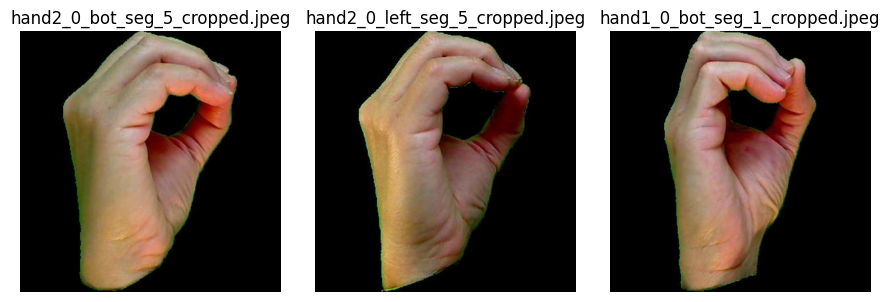

In [30]:
display_images('/content/asl_dataset/0') # Showing an example image that can be found in the dataset

In [9]:
input_folder = '/content/asl_dataset'

# Output folder where the split datasets will be saved
output_folder = '/content/data'

# Split with a ratio
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.7, 0.15, 0.15), group_prefix=None)


Copying files: 2515 files [00:00, 4786.53 files/s]


In [17]:
datagen = ImageDataGenerator(rescale= 1.0 / 255)

# Splitting the training data
train_data = datagen.flow_from_directory(directory= train_path,
                                         target_size=(image_size,image_size),
                                         batch_size = batch,
                                         class_mode='categorical')

# Splitting the validation data
val_data = datagen.flow_from_directory(directory= val_path,
                                       target_size=(image_size,image_size),
                                       batch_size = batch,
                                       class_mode='categorical')

# Splitting the testing data
test_data = datagen.flow_from_directory(directory= test_path,
                                         target_size=(image_size,image_size),
                                         batch_size = batch,
                                         class_mode='categorical',
                                         shuffle= False)

Found 1760 images belonging to 36 classes.
Found 359 images belonging to 36 classes.
Found 396 images belonging to 36 classes.


## Training the model

In [18]:
history = model.fit(
    train_data,
    epochs=6,
    validation_data=val_data)


Epoch 1/6
55/55 [==============================] - 7s 87ms/step - loss: 1.3163 - accuracy: 0.6438 - val_loss: 0.4228 - val_accuracy: 0.8496
Epoch 2/6
55/55 [==============================] - 4s 79ms/step - loss: 0.2257 - accuracy: 0.9318 - val_loss: 0.2434 - val_accuracy: 0.9192
Epoch 3/6
55/55 [==============================] - 5s 93ms/step - loss: 0.1358 - accuracy: 0.9693 - val_loss: 0.1806 - val_accuracy: 0.9415
Epoch 4/6
55/55 [==============================] - 4s 69ms/step - loss: 0.1297 - accuracy: 0.9597 - val_loss: 0.1481 - val_accuracy: 0.9499
Epoch 5/6
55/55 [==============================] - 4s 75ms/step - loss: 0.0858 - accuracy: 0.9761 - val_loss: 0.1109 - val_accuracy: 0.9610
Epoch 6/6
55/55 [==============================] - 4s 68ms/step - loss: 0.0317 - accuracy: 0.9920 - val_loss: 0.0912 - val_accuracy: 0.9777


## Model evaluation

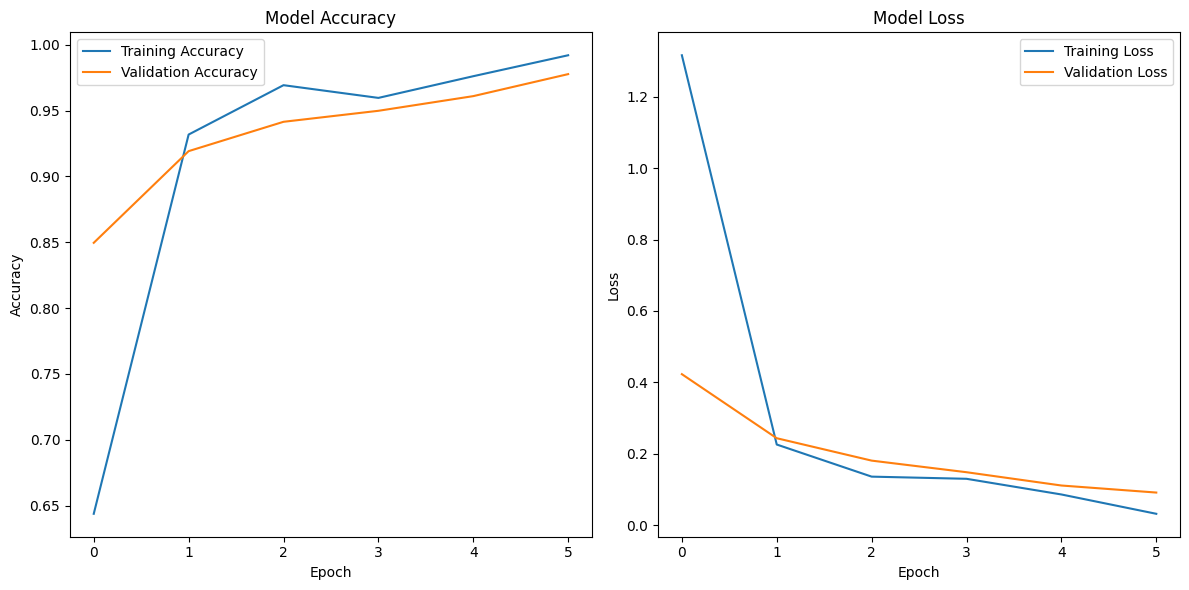

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



In [20]:

# Getting a classification report to evaluate the model
true_classes = test_data.classes
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

print(classification_report(true_classes, predicted_classes, target_names=test_data.class_indices.keys()))


13/13 [==============================] - 2s 66ms/step
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        11
           4       1.00      0.91      0.95        11
           5       0.92      1.00      0.96        11
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00        11
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00        11
           a       1.00      1.00      1.00        11
           b       1.00      1.00      1.00        11
           c       1.00      1.00      1.00        11
           d       1.00      1.00      1.00        11
           e       1.00      1.00      1.00        11
           f       1.00      1.00      1.00        11
           g       1.00    